<a href="https://colab.research.google.com/github/anabellatus/machine_learning/blob/main/jobsheet11/ML_Tugas2_JS11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tugas 2 Jobsheet 11 Machine learning - Convolutional Neural Network (CNN)

### Nama : Ana Bellatus Mustaqfiro
### NIM : 2241720095
### Kelas : TI-3F / 04

## Tugas 2

 Buatlah model CNN untuk klasifikasi dataset MNIST.

### Pra Pengolahan Data

Import Library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

Load Data

In [4]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Pengecekan Data MINST

Jumlah data keseluruhan: 60000
Jumlah data dengan label 0: 5923
Jumlah data dengan label 1: 6742
Jumlah data dengan label 2: 5958
Jumlah data dengan label 3: 6131
Jumlah data dengan label 4: 5842
Jumlah data dengan label 5: 5421
Jumlah data dengan label 6: 5918
Jumlah data dengan label 7: 6265
Jumlah data dengan label 8: 5851
Jumlah data dengan label 9: 5949
Dimensi data: (28, 28)


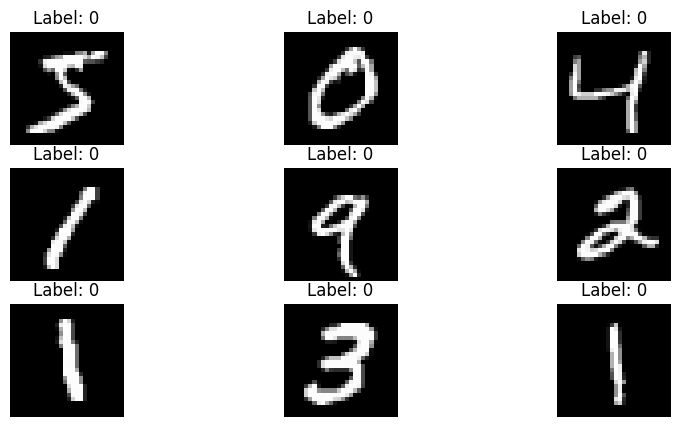

In [5]:
# Menghitung jumlah keseluruhan data
total_data = len(y_train)
print (f"Jumlah data keseluruhan: {total_data}")

# Menghitung jumlah data MNIST pada setiap label
label_counts = np.bincount(y_train)
for label, count in enumerate(label_counts):
  print(f"Jumlah data dengan label {label}: {count}")

# Menampilkan dimensi data
data_shape = X_train[0].shape
print (f"Dimensi data: {data_shape}")

# Menampilkan data
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
    plt.axis('off')
plt.show()

Preprocessing

In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

Y_train = to_categorical(y_train, num_classes=10)
Y_test = to_categorical(y_test, num_classes=10)

### Membuat Model CNN

Buat Layer Konvolusi

In [7]:
model = models.Sequential()

model.add(layers.Conv2D(16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPooling2D(pool_size=(1,1)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Cek Arsitektur Konvolusi

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 16)          │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160 (640.00 B)

 Trainable params: 160 (640.00 B)

 Non-trainable params: 0 (0.00 B)

Tambahkan Layer Fully Connected

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

Cek Arsitektur Model CNN

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 26, 26, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 10816)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,384,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,386,026 (5.29 MB)

 Trainable params: 1,386,026 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

Compile Model CNN

In [11]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

Fitting Model

In [13]:
history=model.fit(X_train, Y_train, batch_size=128, epochs=10, validation_data=(X_test, Y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9927 - loss: 0.0203 - val_accuracy: 0.9861 - val_loss: 0.0466
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 85ms/step - accuracy: 0.9939 - loss: 0.0182 - val_accuracy: 0.9861 - val_loss: 0.0493
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 82ms/step - accuracy: 0.9932 - loss: 0.0185 - val_accuracy: 0.9870 - val_loss: 0.0466
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 78ms/step - accuracy: 0.9940 - loss: 0.0163 - val_accuracy: 0.9874 - val_loss: 0.0505
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 79ms/step - accuracy: 0.9947 - loss: 0.0151 - val_accuracy: 0.9856 - val_loss: 0.0510
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 78ms/step - accuracy: 0.9938 - loss: 0.0177 - val_accuracy: 0.9861 - val_loss: 0.0559
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 43s 91ms/step - accuracy: 0.9946 - loss: 0.0149 - val_accuracy: 0.9854 - val_loss: 0.0557
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 83ms/step - accuracy: 0.9949 - loss: 0.0154 - 

Evaluasi Model

In [14]:
test_scores = model.evaluate(X_test, Y_test, verbose=2)
loss_cnn = test_scores[0]*100
accuracy_cnn =  test_scores[1]*100
print('Test loss:', loss_cnn)
print('Test accuracy:', accuracy_cnn)

313/313 - 2s - 7ms/step - accuracy: 0.9864 - loss: 0.0598
Test loss: 5.976996943354607
Test accuracy: 98.64000082015991


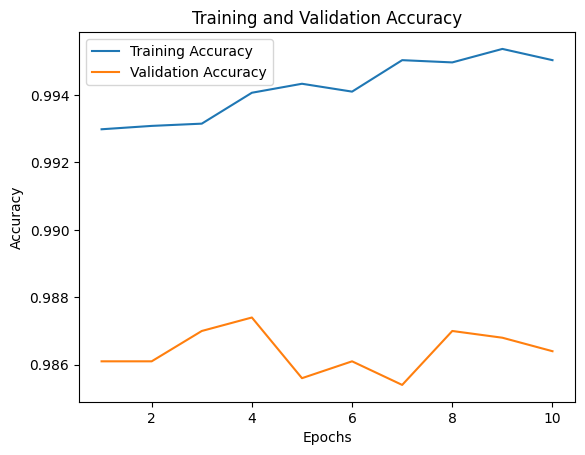

In [15]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(range(1, len(train_acc) + 1), train_acc, label='Training Accuracy')
plt.plot(range(1, len(val_acc) + 1), val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Visualisasi Hasil Prediksi

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


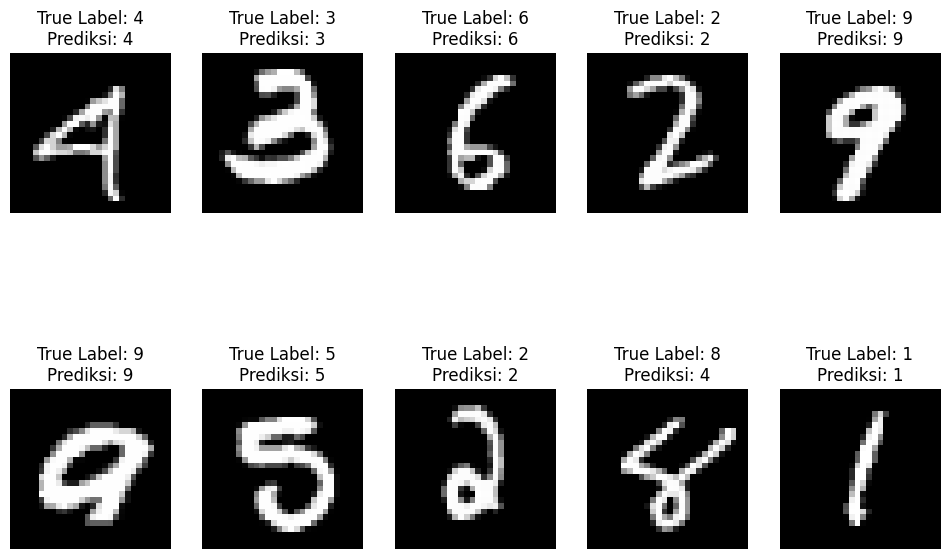

In [16]:
random_indices = np.random.choice(X_test.shape[0], 10, replace=False)

original_images = X_test[random_indices].reshape(-1, 28, 28)
true_labels = y_test[random_indices]
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=-1)

plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    plt.title(f'True Label: {true_labels[i]}\nPrediksi: {predicted_labels[random_indices[i]]}')
    plt.axis('off')

plt.show()